This is the main file for feature comparisons and hyperparameters optimization

In [1]:
# import functions
import importlib
import functions
importlib.reload(functions)
from functions import *

C:\Users\ytw\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ytw\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\ytw\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\ytw\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


import features

In [2]:
# import extracted features
baseline = pd.read_csv('features/baseline.csv')
fft = pd.read_csv('features/fft.csv')
ti = pd.read_csv('features/ti.csv')
rolloff = pd.read_csv('features/rolloff.csv')
psd = pd.read_csv('features/psd.csv')
wt = pd.read_csv('features/wavelets.csv')

pre-processing every features

In [3]:
baseline_X_train, y_train, baseline_X_test, y_test = pre_features(0.8, baseline)
fft_X_train, y_train, fft_X_test, y_test = pre_features(0.8, fft)
ti_X_train, y_train, ti_X_test, y_test = pre_features(0.8, ti)
rolloff_X_train, y_train, rolloff_X_test, y_test = pre_features(0.8, rolloff)
psd_X_train, y_train, psd_X_test, y_test = pre_features(0.8, psd)
wt_X_train, y_train, wt_X_test, y_test = pre_features(0.8, wt)

fit every feature by knn

In [4]:
# store result of all the features
result = {}

In [5]:
%%time
result['baseline train'] = simple_knn(baseline_X_train, y_train, baseline_X_train, y_train)
result['baseline cv'] = knn_cv(baseline_X_train, y_train, baseline_X_test, y_test, 5)
result['baseline test'] = simple_knn(baseline_X_train, y_train, baseline_X_test, y_test)
result['fft train'] = simple_knn(fft_X_train, y_train, fft_X_train, y_train)
result['fft cv'] = knn_cv(fft_X_train, y_train, fft_X_test, y_test, 5)
result['fft test'] = simple_knn(fft_X_train, y_train, fft_X_test, y_test)
result['ti train'] = simple_knn(ti_X_train, y_train, ti_X_train, y_train)
result['ti cv'] = knn_cv(ti_X_train, y_train, ti_X_test, y_test, 5)
result['ti test'] = simple_knn(ti_X_train, y_train, ti_X_test, y_test)
result['rolloff train'] = simple_knn(rolloff_X_train, y_train, rolloff_X_train, y_train)
result['rolloff cv'] = knn_cv(rolloff_X_train, y_train, rolloff_X_test, y_test, 5)
result['rolloff test'] = simple_knn(rolloff_X_train, y_train, rolloff_X_test, y_test)
result['psd train'] = simple_knn(psd_X_train, y_train, psd_X_train, y_train)
result['psd cv'] = knn_cv(psd_X_train, y_train, psd_X_test, y_test, 5)
result['psd test'] = simple_knn(psd_X_train, y_train, psd_X_test, y_test)
result['wave train'] = simple_knn(wt_X_train, y_train, wt_X_train, y_train)
result['wave cv'] = knn_cv(wt_X_train, y_train, wt_X_test, y_test, 5)
result['wave test'] = simple_knn(wt_X_train, y_train, wt_X_test, y_test)

Wall time: 4min 26s


result

In [6]:
result_df = pd.DataFrame(list(result.items()), columns=['feature', 'F1'])
# change the format of result
result_table = {'Feature': ['Baseline', 'FFT', 'Temporal Integration', 'Rolloff', 'PSD', 'Wavelet'],
        'Train Score': list(result_df[result_df.index % 3 == 0]['F1']),
        'CV Score': list(result_df[result_df.index % 3 == 1]['F1']),
        'Test Score': list(result_df[result_df.index % 3 == 2]['F1']),}
table_df = pd.DataFrame(result_table)
table_df

,Feature,Train Score,CV Score,Test Score
0,Baseline,0.318795,0.166926,0.157259
1,FFT,0.750555,0.703950,0.687624
2,Temporal Integration,0.754529,0.697128,0.700390
3,Rolloff,0.452729,0.322452,0.331178
4,PSD,0.705141,0.642037,0.646198
5,Wavelet,0.677603,0.608690,0.608235


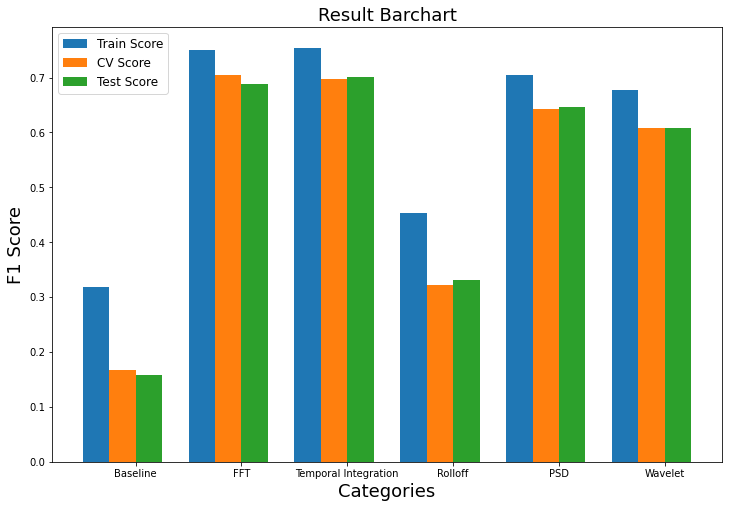

In [7]:
# Display
plt.figure(figsize=(12, 8))
bar_width = 0.25  # Adjust as needed
bar_positions = range(len(table_df['Feature']))

plt.bar(bar_positions, table_df['Train Score'], width=bar_width, label='Train Score')
# plt.bar([pos + bar_width for pos in bar_positions], table_df['cv_score_2'], width=bar_width, label='cv score 2')
plt.bar([pos + bar_width for pos in bar_positions], table_df['CV Score'], width=bar_width, label='CV Score')
plt.bar([pos + 2*bar_width for pos in bar_positions], table_df['Test Score'], width=bar_width, label='Test Score')

# Adding labels and title
plt.xlabel('Categories', fontsize=18)
plt.ylabel('F1 Score', fontsize=18)
plt.title('Result Barchart', fontsize=18)

# Adding legend
plt.legend(fontsize='large')

# Adjusting x-axis ticks and labels
plt.xticks([pos + 1.5*bar_width for pos in bar_positions], table_df['Feature'])

# Display the chart
plt.show()

looks like Temporal Integration is the best feature 

Optimise the hyperparameter, number of neighbours and weights

In [8]:
%%time
ns = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
weights = ['uniform', 'distance']
grid_search_stft = grid_search_cv(ti_X_train, y_train, ns, weights, 5)

Wall time: 7min 10s


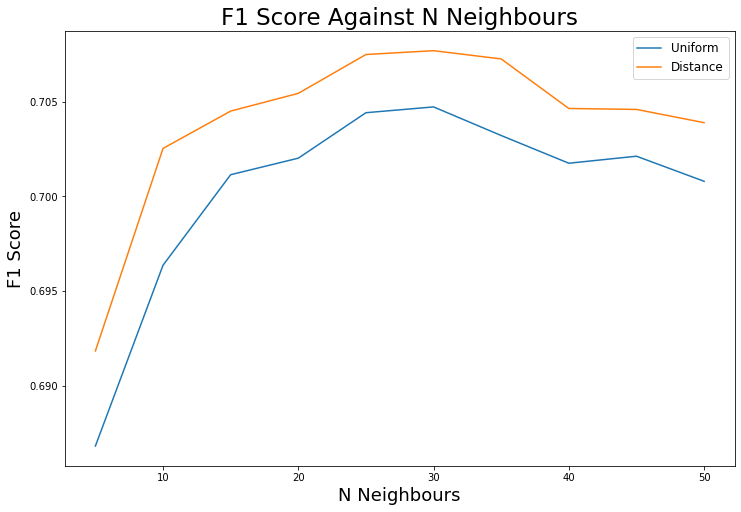

the best result of stft when use distance for n is 30, which is 0.7076935552947077


In [9]:
# print the curve
plt.figure(figsize=(12, 8))
plt.plot(ns, list(grid_search_stft.values())[0], label='Uniform')
plt.plot(ns, list(grid_search_stft.values())[1], label='Distance')
plt.title('F1 Score Against N Neighbours',fontsize=23)
plt.xlabel('N Neighbours',fontsize=18)
plt.ylabel('F1 Score',fontsize=18)
plt.legend(fontsize='large')
plt.show()

# locate the best parameter
best_weight = max(grid_search_stft, key=lambda k: max(enumerate(grid_search_stft[k]), key=lambda x: x[1])[1])
best_n = ns[max(enumerate(grid_search_stft[best_weight]), key=lambda x: x[1])[0]]
max_result = max((max(lst) for lst in grid_search_stft.values()))

print(f'the best result of stft when use {best_weight} for n is {best_n}, which is {max_result}')

In [15]:
f1_train = final_knn_cv(ti_X_train, y_train, ti_X_train, y_train, 5, best_n, best_weight)
f1_test = final_knn_cv(ti_X_train, y_train, ti_X_test, y_test, 5, best_n, best_weight)

print(f'Fitting F1 score on training set is {f1_train}, on testing set is {f1_test}.')

# check whether its overfitted
if f1_train > f1_test:
    print('The model is overfitted.')
else:
    print('The model is not overfitted.')

Fitting F1 score on training set is 0.7125467790355193, on testing set is 0.7125467790355193.
The model is not overfitted.
